In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
models = ['rf', 'dt', 'knn', 'xgb', 'lr', 'nb', 'mlp', 'svm']
features = ['%sys', '%memused']

In [3]:
data = {}

for model in models:
    df = pd.read_csv("results/{0}.csv".format(model), sep=';')
    data[model] = {
                    "sys_mean" : df[features].describe()['%sys']['mean'], 
                    "sys_std"  : df[features].describe()['%sys']['std'], 
                    "sys_max"  : df[features].describe()['%sys']['max'], 
                    "sys_min"  : df[features].describe()['%sys']['min'],
                    "mem_mean" : df[features].describe()['%memused']['mean'], 
                    "mem_std"  : df[features].describe()['%memused']['std'], 
                    "mem_max"  : df[features].describe()['%memused']['max'], 
                    "mem_min"  : df[features].describe()['%memused']['min']
                  }


In [4]:
df.columns.values

array(['# hostname', 'interval', 'timestamp', 'CPU', '%usr', '%nice',
       '%sys', '%iowait', '%steal', '%irq', '%soft', '%guest', '%gnice',
       '%idle[...]', 'kbmemfree', 'kbavail', 'kbmemused', '%memused',
       'kbbuffers', 'kbcached', 'kbcommit', '%commit', 'kbactive',
       'kbinact', 'kbdirty', 'kbanonpg', 'kbslab', 'kbkstack', 'kbpgtbl',
       'kbvmused', 'IFACE', 'rxpck/s', 'txpck/s', 'rxkB/s', 'txkB/s',
       'rxcmp/s', 'txcmp/s', 'rxmcst/s', '%ifutil[...]', 'IFACE.1',
       'rxerr/s', 'txerr/s', 'coll/s', 'rxdrop/s', 'txdrop/s', 'txcarr/s',
       'rxfram/s', 'rxfifo/s', 'txfifo/s[...]', 'call/s', 'retrans/s',
       'read/s', 'write/s', 'access/s', 'getatt/s', 'scall/s',
       'badcall/s', 'packet/s', 'udp/s', 'tcp/s', 'hit/s', 'miss/s',
       'sread/s', 'swrite/s', 'saccess/s', 'sgetatt/s', 'totsck',
       'tcpsck', 'udpsck', 'rawsck', 'ip-frag', 'tcp-tw', 'irec/s',
       'fwddgm/s', 'idel/s', 'orq/s', 'asmrq/s', 'asmok/s', 'fragok/s',
       'fragcrt/s', 'ihd

In [18]:
# features with variance greater than zero
m=df.var()>0
df_filtered = df.loc[:, m.reindex(df.columns, axis=1, fill_value=False)]
df_filtered.columns.values

array(['%usr', '%sys', '%iowait', '%soft', '%idle[...]', 'kbmemfree',
       'kbavail', 'kbmemused', '%memused', 'kbbuffers', 'kbcached',
       'kbcommit', '%commit', 'kbactive', 'kbinact', 'kbdirty',
       'kbanonpg', 'kbslab', 'kbkstack', 'kbpgtbl', 'kbvmused', 'rxpck/s',
       'txpck/s', 'rxkB/s', 'txkB/s', '%ifutil[...]', 'totsck', 'irec/s',
       'idel/s', 'orq/s', 'passive/s', 'iseg/s', 'oseg/s', 'tcp6sck',
       'total/s'], dtype=object)

In [19]:
x_pos = np.arange(len(models))
sys_mean = [value['sys_mean'] for value in data.values()]
sys_std = [value['sys_std'] for value in data.values()]

In [20]:
plt.style.use('plot_style.txt')

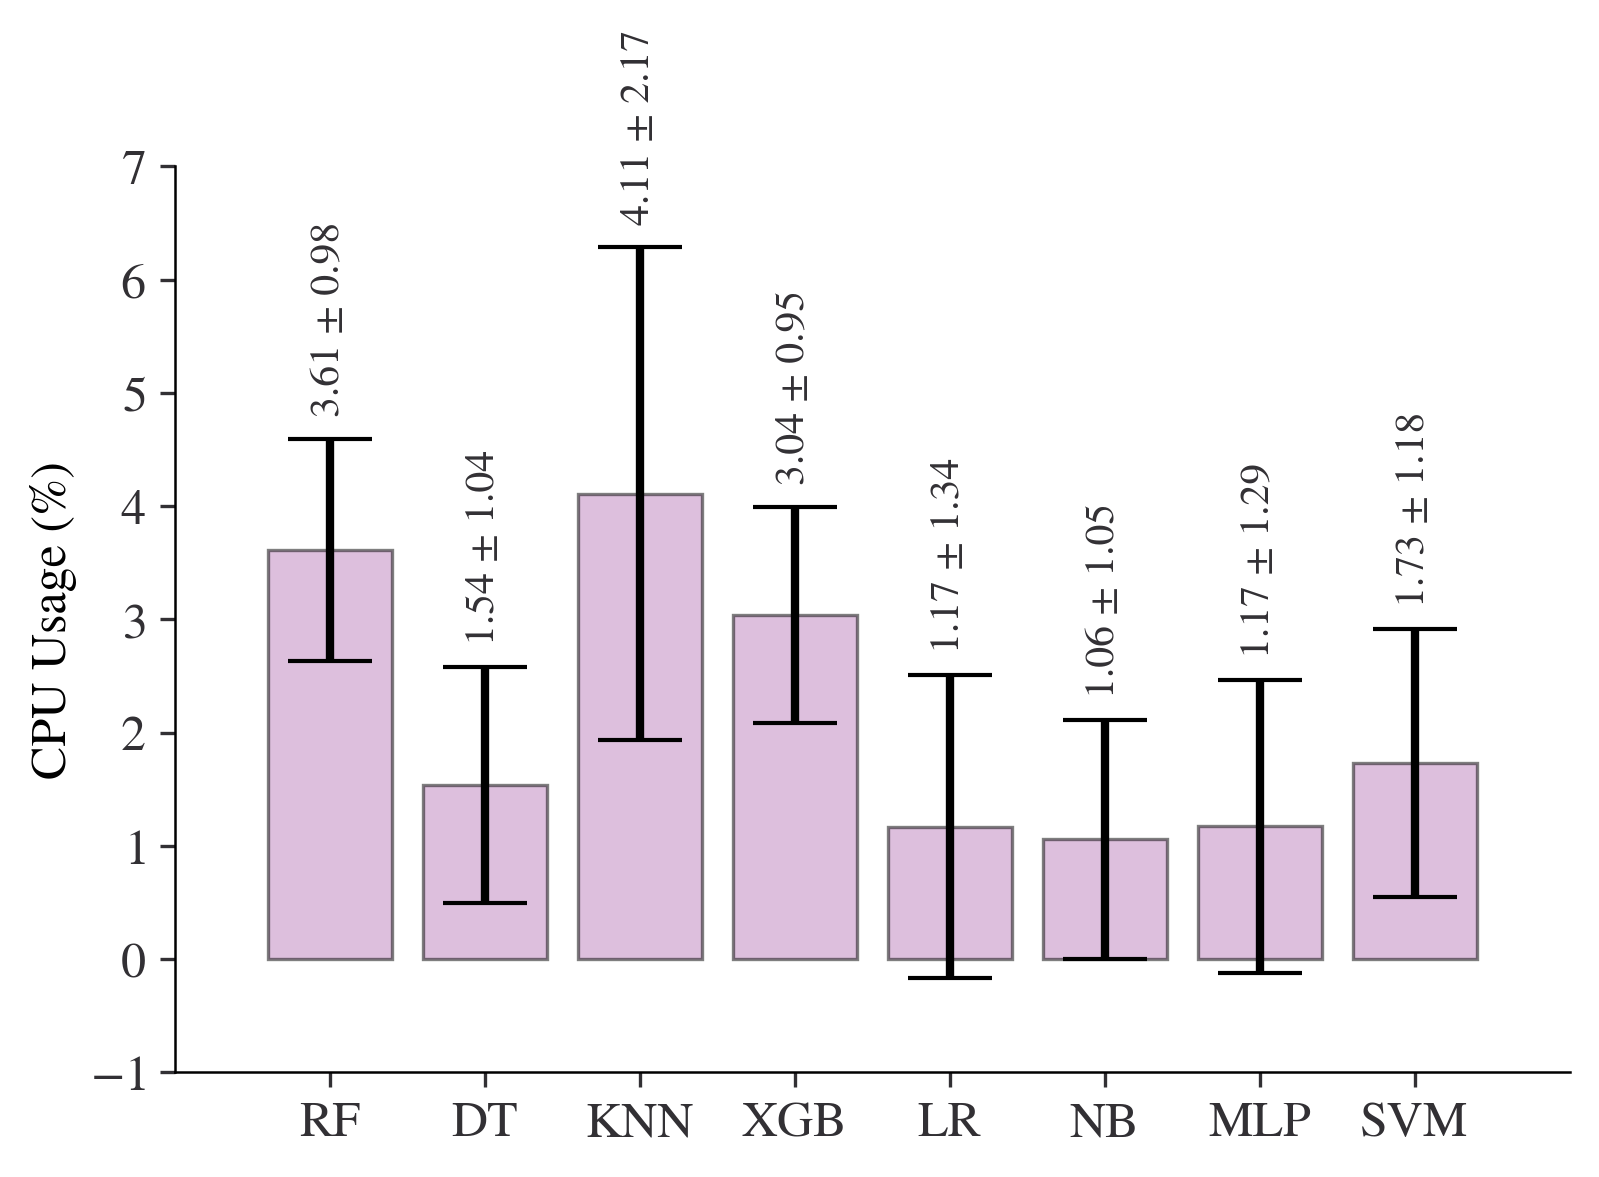

In [38]:
import os
fig, ax = plt.subplots()
ax.bar(x_pos, sys_mean, yerr=sys_std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('CPU Usage (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(model.upper() for model in models)
for i in range(0, len(sys_mean)):
    plt.text(i, sys_mean[i]+sys_std[i]+0.2, str(round(sys_mean[i],2))+" ± "+str(round(sys_std[i],2)), ha="center", va="bottom", rotation=90)
plt.savefig(os.path.join('images/', 'cpu_usage_ml_models.pdf'), dpi=300, bbox_inches = "tight")
plt.show()

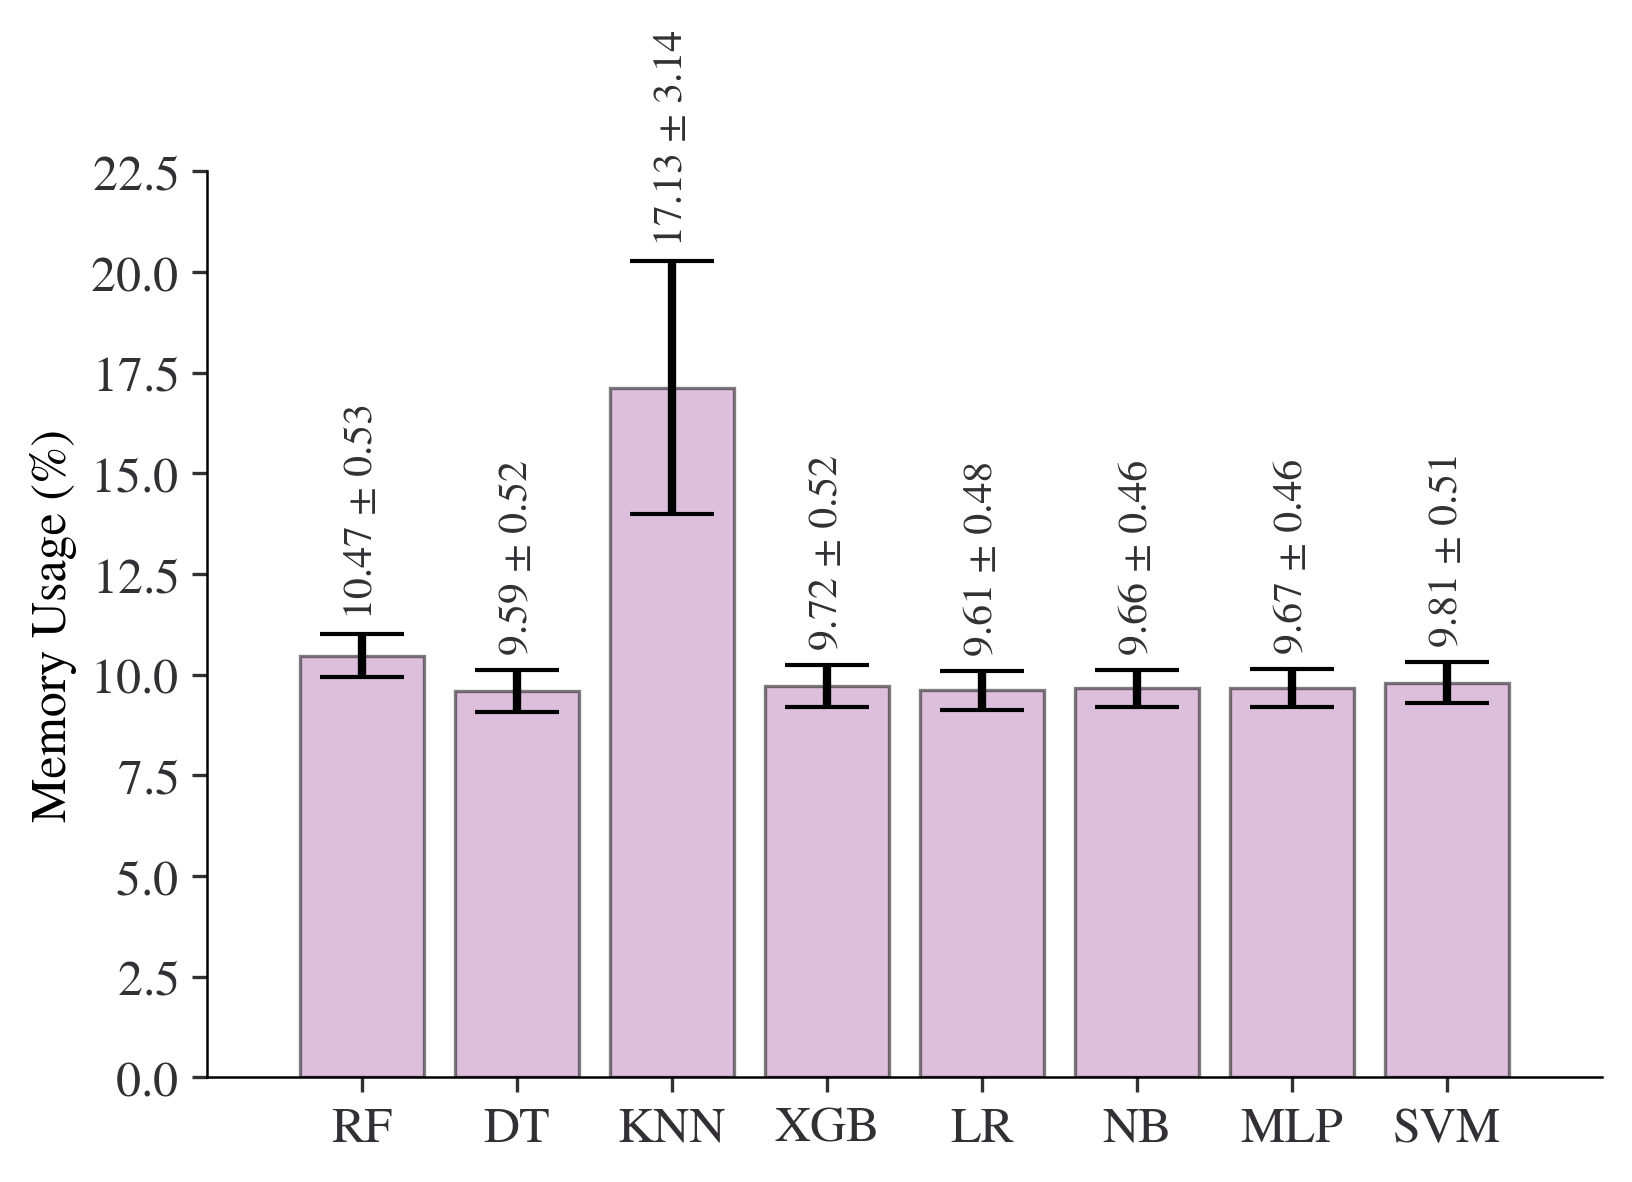

In [41]:
x_pos = np.arange(len(models))
mem_mean = [value['mem_mean'] for value in data.values()]
mem_std = [value['mem_std'] for value in data.values()]

fig, ax = plt.subplots()
ax.bar(x_pos, mem_mean, yerr=mem_std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Memory Usage (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(model.upper() for model in models)
for i in range(0, len(mem_mean)):
    plt.text(i, mem_mean[i]+mem_std[i]+0.4, str(round(mem_mean[i],2))+" ± "+str(round(mem_std[i],2)), ha="center", va="bottom", rotation=90)
plt.savefig(os.path.join('images/', 'mem_usage_ml_models.pdf'), dpi=300, bbox_inches = "tight")
plt.show()